# Hypothesis Testing
- we will be using our MySQL database from part 3 to answer meaningful questions for our stakeholder. They want you to use our hypothesis testing and statistics knowledge to answer 3 questions about what makes a successful movie.

## Questions to Answer
1. The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

- They want you to perform a statistical test to get a mathematically-supported answer.
They want you to report if you found a significant difference between ratings.
If so, what was the p-value of your analysis?
And which rating earns the most revenue?
They want you to prepare a visualization that supports your finding.
It is then up to you to think of 2 additional hypotheses to test that your stakeholder may want to know.

Some example hypotheses we could test:

1. Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?
2. Do movies released in 2020 earn less revenue than movies released in 2018?
3. How do the years compare for movie ratings?
4. Do some movie genres earn more revenue than others?
5. Are some genres higher rated than others?
etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy

# Question 1.
1.) Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?
- Null hypothesis: The rating of a movie does not affect the revenue that it makes.
- Alternate hypothesis: The rating of a movie potentially affects the amount of revenue that it makes.
 - Reject" the null hypothesis OR "Fail to reject" the null hypothesis.


- Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? 6
- Therefore, which test is appropriate? ANOVA and/or Tukey

In [2]:
df= pd.read_csv("Data/cleaned_movie_info_all.csv.gz", low_memory=False)
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,...,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,Year,Month,Day
0,tt0312305,0.0,False,0.0,2.769,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,...,False,False,False,False,False,False,False,2012.0,12.0,2.0
1,tt0326965,0.0,False,0.0,6.120,0.0,90.0,In My Sleep,5.5,31.0,...,False,False,False,False,False,False,False,2010.0,4.0,23.0
2,tt0331312,0.0,False,0.0,0.600,0.0,0.0,This Wretched Life,5.0,1.0,...,False,False,False,False,False,False,False,2010.0,1.0,1.0
3,tt0393049,0.0,False,300000.0,2.418,0.0,98.0,Anderson's Cross,4.0,5.0,...,False,False,False,False,False,False,False,2010.0,5.0,20.0
4,tt0398286,0.0,False,260000000.0,119.168,592461732.0,100.0,Tangled,7.6,9364.0,...,False,False,False,False,False,False,False,2010.0,11.0,24.0


In [3]:
df.dropna(inplace=True)

In [4]:
df['certification'].value_counts()

R        6090
NR       3263
PG-13    3220
PG       1431
G         441
NC-17     155
Name: certification, dtype: int64

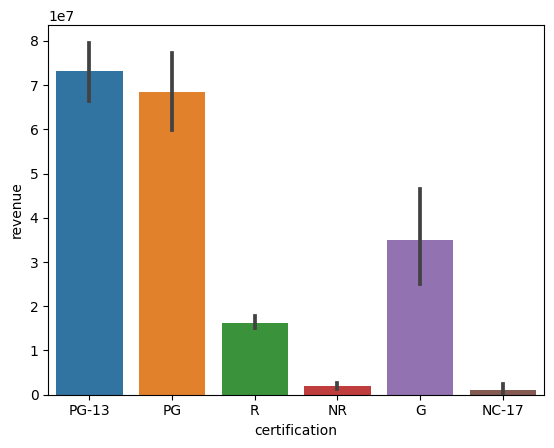

In [5]:
sns.barplot(data=df, x='certification',y='revenue');

In [6]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG-13', 'PG', 'R', 'NR', 'G', 'NC-17'])

In [7]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG-13,3220.0,0.000000e+00,3518.016905
PG,1431.0,4.480376e-270,1240.396536
R,6090.0,0.000000e+00,7603.954647
NR,3263.0,0.000000e+00,7089.300242
G,441.0,3.125544e-112,513.499844
NC-17,155.0,8.690936e-59,267.380480


In [8]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG-13,3220.0,0.000000e+00,3518.016905,True
PG,1431.0,4.480376e-270,1240.396536,True
R,6090.0,0.000000e+00,7603.954647,True
NR,3263.0,0.000000e+00,7089.300242,True
G,441.0,3.125544e-112,513.499844,True
NC-17,155.0,8.690936e-59,267.380480,True


In [9]:
# Test for Equal Variance
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=180.89147160707088, pvalue=1.849133512952147e-187)

In [10]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=180.7559460210055, pvalue=2.541385643831967e-187)

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['revenue']
labels = df['certification']

In [12]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-33853666.4924,0.0202,-64460201.3835,-3247131.6012,True
G,NR,-33150685.8772,0.0,-49780363.6907,-16521008.0637,True
G,PG,33483807.4712,0.0,15631679.6219,51335935.3204,True
G,PG-13,38099463.0928,0.0,21456570.4514,54742355.7343,True
G,R,-18712364.7296,0.0125,-34875964.1422,-2548765.317,True
NC-17,NR,702980.6152,1.0,-26242617.0596,27648578.2899,False
NC-17,PG,67337473.9635,0.0,39620736.8068,95054211.1202,True
NC-17,PG-13,71953129.5852,0.0,44999374.2746,98906884.8958,True
NC-17,R,15141301.7628,0.5861,-11519174.524,41801778.0496,False
NR,PG,66634493.3484,0.0,56242009.2974,77026977.3993,True


Final Conclusion: p<alpha for the majority of the final test. We reject the null hypothesis and support the alternative hypothesis The rating of a movie potentially affects the amount of revenue that it makes.

In [ ]:
ax = sns.histplot(data=df, x='revenue', hue='certification')
ax.set_title("Revenue based on certification");

# Question 2:
2. How do the years compare for movie ratings?
- Null hypothesis: The year a movie does not affect the MPAA Rating.
- Alternate hypothesis: The year a movie affects the MPAA Rating.
 - Reject" the null hypothesis OR "Fail to reject" the null hypothesis.


- Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? 6
- Therefore, which test is appropriate? ANOVA and/or Tukey

In [14]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'Year'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG-13', 'PG', 'R', 'NR', 'G', 'NC-17'])

In [15]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG-13,3220.0,7.771236e-178,815.619435
PG,1431.0,2.930413e-21,94.558287
R,6090.0,0.000000e+00,1828.656935
NR,3263.0,2.338587e-43,196.323224
G,441.0,3.545863e-05,20.494288
NC-17,155.0,6.220999e-03,10.159649


In [16]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG-13,3220.0,7.771236e-178,815.619435,True
PG,1431.0,2.930413e-21,94.558287,True
R,6090.0,0.000000e+00,1828.656935,True
NR,3263.0,2.338587e-43,196.323224,True
G,441.0,3.545863e-05,20.494288,True
NC-17,155.0,6.220999e-03,10.159649,True


In [17]:
# Test for Equal Variance
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=44.022491217500615, pvalue=3.1267925560209396e-45)

In [18]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=106.55223663379093, pvalue=7.37542999259362e-111)

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['Year']
labels = df['certification']

In [20]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,0.6913,0.7973,-0.8507,2.2333,False
G,NR,1.6954,0.0,0.8576,2.5332,True
G,PG,-0.3305,0.9018,-1.2299,0.5689,False
G,PG-13,-0.7763,0.0882,-1.6148,0.0622,False
G,R,-1.108,0.0015,-1.9223,-0.2937,True
NC-17,NR,1.0041,0.283,-0.3535,2.3616,False
NC-17,PG,-1.0218,0.2948,-2.4182,0.3746,False
NC-17,PG-13,-1.4676,0.0253,-2.8255,-0.1096,True
NC-17,R,-1.7993,0.0019,-3.1425,-0.4561,True
NR,PG,-2.0259,0.0,-2.5495,-1.5023,True


Final Conclusion: p<alpha for the majority of the final test. We reject the null hypothesis and support the alternative hypothesis The year a movie potentially affects the MPAA Rating.

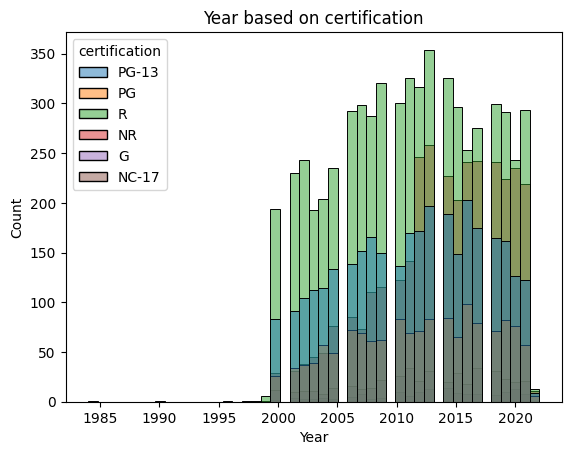

In [21]:
ax = sns.histplot(data=df, x='Year', hue='certification')
ax.set_title("Year based on certification");

# Question 3:
3. Do PG movies have longer runtime than others?
- Null hypothesis: PG movies do not have longer runtime compared to all others.
- Alternate hypothesis: PG movies have longer runtimes than all others.


- Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? 6
- Therefore, which test is appropriate? ANOVA and/or Tukey

In [22]:
## create a column that easily separates our groups
df['is_pg'] = df['certification'].str.contains('PG')
df['is_pg'].value_counts()

False    9949
True     4651
Name: is_pg, dtype: int64

In [23]:
## save list of columns needed for each group
needed_cols = ['runtime','is_pg']
df[needed_cols]

,runtime,is_pg
1,90.0,True
4,100.0,True
6,92.0,False
7,112.0,False
8,95.0,False
...,...,...
60070,161.0,True
60118,93.0,True
60119,70.0,False
60125,77.0,True


In [24]:
## save non_pg in separate variable
non_pg = df.loc[ df['is_pg']==False, needed_cols]
non_pg

,runtime,is_pg
6,92.0,False
7,112.0,False
8,95.0,False
11,103.0,False
15,98.0,False
...,...,...
60018,69.0,False
60066,48.0,False
60069,0.0,False
60119,70.0,False


In [25]:
## save PG in separate variables
pg = df.loc[ df['is_pg']==True, needed_cols]
pg

,runtime,is_pg
1,90.0,True
4,100.0,True
9,114.0,True
10,117.0,True
14,112.0,True
...,...,...
59952,98.0,True
60034,90.0,True
60070,161.0,True
60118,93.0,True


In [26]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([non_pg,pg])
plot_df

,runtime,is_pg
6,92.0,False
7,112.0,False
8,95.0,False
11,103.0,False
15,98.0,False
...,...,...
59952,98.0,True
60034,90.0,True
60070,161.0,True
60118,93.0,True


In [27]:
# Testing Assumption
## Saving JUST the numeric col as final group variables
pg_group = pg['runtime']
non_pg_group =  non_pg['runtime']
non_pg_group

6         92.0
7        112.0
8         95.0
11       103.0
15        98.0
         ...  
60018     69.0
60066     48.0
60069      0.0
60119     70.0
60127     61.0
Name: runtime, Length: 9949, dtype: float64

In [28]:
## Check non_pg_group for outliers
non_pg_outliers = np.abs(stats.zscore(non_pg_group))>3

## how many outliers?
non_pg_outliers.value_counts()

False    9751
True      198
Name: runtime, dtype: int64

In [29]:
## remove outliers from non_pg_group
non_pg_group = non_pg_group[~non_pg_outliers]

In [30]:
## Check pg_group for outliers
pg_outliers = np.abs(stats.zscore(pg_group))>3

## how many outliers?
pg_outliers.value_counts()

False    4565
True       86
Name: runtime, dtype: int64

In [31]:
## remove outliers from pg_group
pg_group = pg_group[~pg_outliers]

In [32]:
## Check non_pg_group for normality
result = stats.normaltest(non_pg_group)
result

NormaltestResult(statistic=707.3522138005169, pvalue=2.514307507795894e-154)

In [33]:
## Check n for non_pg_group
len(non_pg_group)

9751

In [34]:
## Check pg_group for normality
result = stats.normaltest(pg_group)
result

NormaltestResult(statistic=380.31952247691646, pvalue=2.5981547461626144e-83)

In [35]:
## Check n for pg_group
len(pg_group)

4565

In [36]:
# Test for equal variance
## Use Levene's test for equal variance
result = stats.levene(pg_group,non_pg_group)
result
result.pvalue<.05

True

In [37]:
# Use an if-else to help interpret the p-value
if result.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


In [38]:
#Final Hypothesis Test
result = stats.ttest_ind(pg_group,non_pg_group,equal_var=False)
result

Ttest_indResult(statistic=18.95644300567393, pvalue=1.636760605973291e-78)

In [39]:
## calcualte group means to know which group had more/less.
non_pg_group.mean(),pg_group.mean()

(96.31155778894473, 102.0039430449069)

Final Conclusion: p<alpha for final t test. We reject the null hypothesis and support the alternative hypothesis that PG rated movies have longer runtime than others.

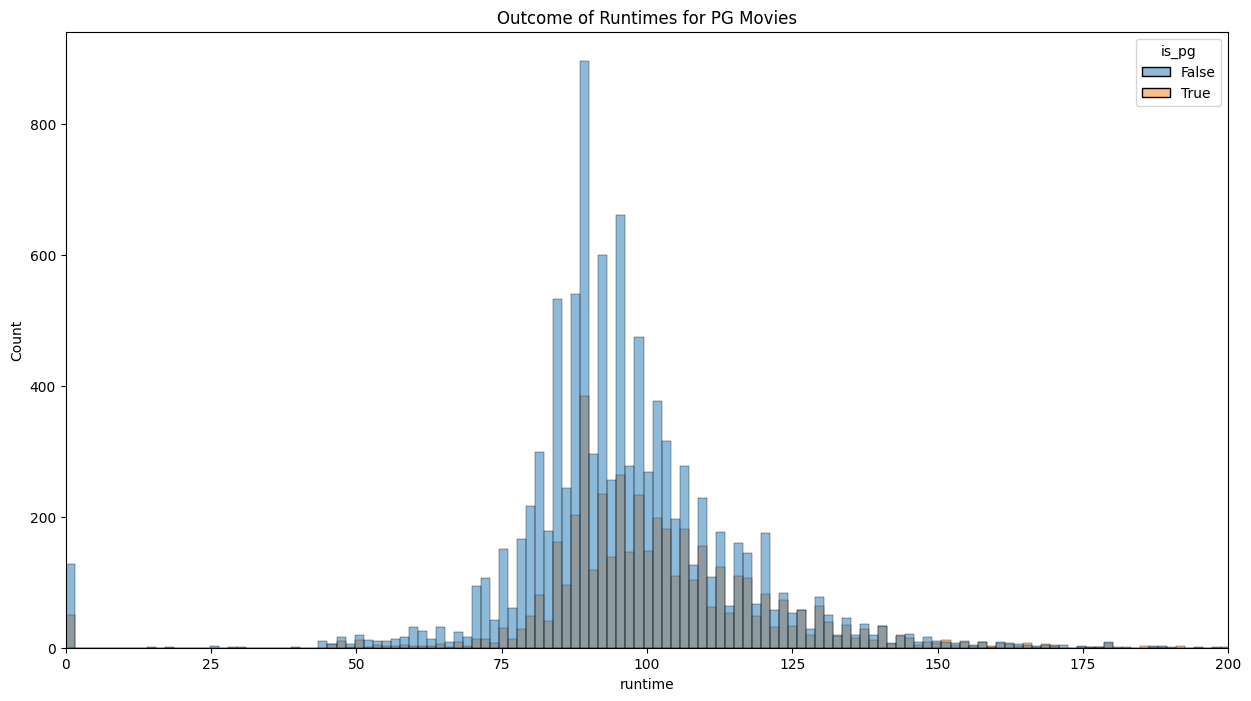

In [40]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=plot_df, x='runtime', hue='is_pg')
ax.set_xlim(0,200)
ax.set_title("Outcome of Runtimes for PG Movies");